# Exercises
* For the scalar model 

$$
X_n = \rho X_{n-1} + \tau V_n 
$$
$$
Y_n = X_n + W_n
$$

Where:

-  $V_n \sim \mathcal{N}(0, 1)  , i.i.d.$
-  $W_n \sim \mathcal{N}(0, 1) , i.i.d.$
-  $X_0 \sim \mathcal{N}(0, 1) $

Here, $ \rho $ and $\tau$  are scalar parameters


## Exercise (1)
* Run the model to synthesise a data-set $y_{0:T}$ for T = 50, $\rho$= 0.8, $\tau$= 1,$\sigma$= 0.1. Store the real state trajectory $x_{0:T}$ for future comparisons.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)

Vn = np.random.normal(size = 50)
Wn = np.random.normal(size = 50)
X0 = np.random.normal(size = 1)

Xn = [(0.8*X0 + Vn[0])]
Yn = [Xn[0] + Wn[0]]
for i in range(1,50):
    Xn.append(0.8*Xn[i-1]+Vn[i])
    Yn.append(Xn[i]+Wn[i])


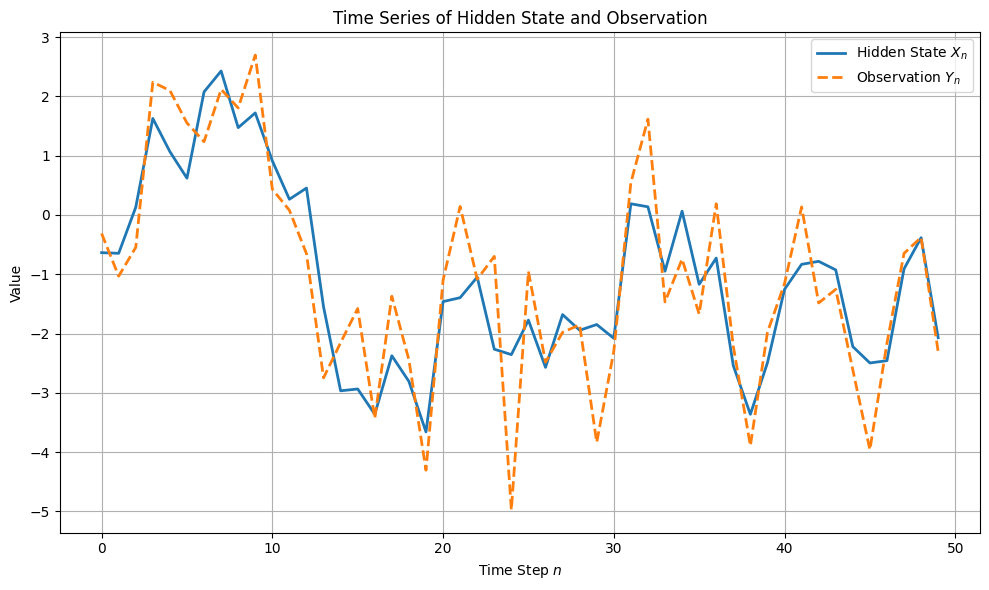

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Xn, label='Hidden State $X_n$', linewidth=2)
plt.plot(Yn, label='Observation $Y_n$', linewidth=2, linestyle='--')
plt.title('Time Series of Hidden State and Observation')
plt.xlabel('Time Step $n$')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Exercise (2)
* Implement the Kalman filter and compare $µ_{n|n}$,$µ_{n|n-1}$ with $x_{0:T}$

In [ ]:
#Initial estimates
m0 = 0.0
P0 = 1.0
m=[]
p=[]
mm = []
pp = []
for i in range(50):
    #Predictions
    m_pred = 0.8*m0 
    p_pred = 0.8**2 * P0 + 1    
    m.append(m_pred) #! μ_{n|n-1}
    p.append(p_pred) #! s_{n|n-1}
    
    #Updates
    K = p_pred/(p_pred+1)
    m0 = m_pred + K *(Yn[i]-m_pred)
    P0 =  (1 - K) * p_pred
    
    mm.append(m0) #! μ_{n|n}
    pp.append(P0) #! s_{n|n}
    
m = [float(val) if isinstance(val, np.ndarray) else val for val in m]
mm = [float(val) if isinstance(val, np.ndarray) else val for val in mm]
Xn = [float(val) if isinstance(val, np.ndarray) else val for val in Xn]


/var/folders/l1/9w4tw7cd27s8jp5crwdfn6c80000gn/T/ipykernel_67358/2215628757.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = [float(val) if isinstance(val, np.ndarray) else val for val in m]
/var/folders/l1/9w4tw7cd27s8jp5crwdfn6c80000gn/T/ipykernel_67358/2215628757.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mm = [float(val) if isinstance(val, np.ndarray) else val for val in mm]


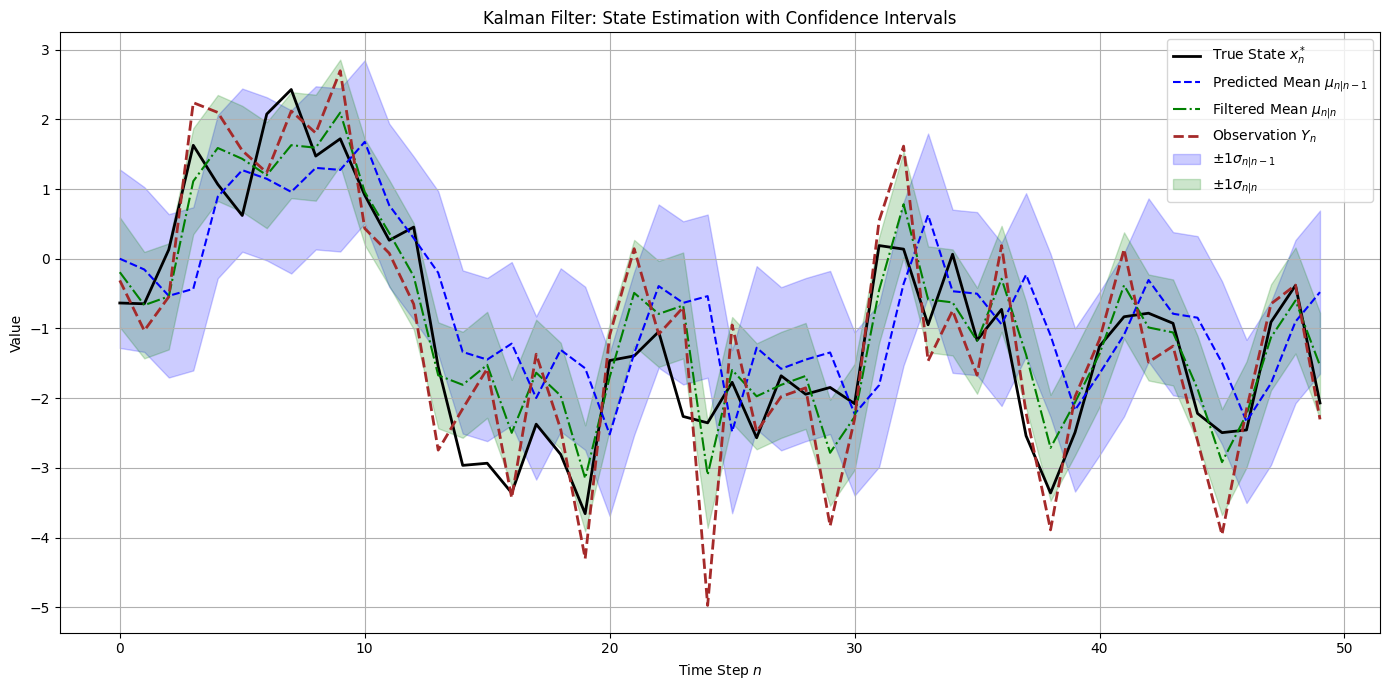

In [37]:
# Std deviations
std_pred = np.sqrt(p)
std_filt = np.sqrt(pp)

# Plotting with confidence intervals
n = np.arange(50)

plt.figure(figsize=(14, 7))
plt.plot(n, Xn, label='True State $x^*_n$', linewidth=2, color='black')
plt.plot(n, m, label='Predicted Mean $\\mu_{n|n-1}$', linestyle='--', color='blue')
plt.plot(n, mm, label='Filtered Mean $\\mu_{n|n}$', linestyle='-.', color='green')
plt.plot(Yn, label='Observation $Y_n$', linewidth=2, linestyle='--', color ='brown')

plt.fill_between(n, np.array(m) - std_pred, np.array(m) + std_pred, color='blue', alpha=0.2, label='$\\pm 1\\sigma_{n|n-1}$')
plt.fill_between(n, np.array(mm) - std_filt, np.array(mm) + std_filt, color='green', alpha=0.2, label='$\\pm 1\\sigma_{n|n}$')

plt.title('Kalman Filter: State Estimation with Confidence Intervals')
plt.xlabel('Time Step $n$')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

